<a href="https://colab.research.google.com/github/andreaeusebi/pytorch_for_deep_learning/blob/main/notebooks/03_pytorch_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer Vision

## Input and output shapes:

NHWC : [batch_size, height, width, color_channel]  --> many libraries use this representation

NCHW : [batch_size, color_channel, height, width] --> this is the default image representation in PyTorch

## Common Libraries

In [121]:
# Import PyTorch
import torch
from torch import nn

from torch.utils.data import DataLoader

print(f"torch version: {torch.__version__}")

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

print(f"torchvision version: {torchvision.__version__}")

# Import matoplot lib
import matplotlib.pyplot as plt

torch version: 2.1.0+cu121
torchvision version: 0.16.0+cu121


## 1. Getting a Dataset

In [122]:
train_data = datasets.FashionMNIST(root="data",
                                   train=True,
                                   download=True,
                                   transform=ToTensor(),
                                   target_transform=None)

test_data = datasets.FashionMNIST(root="data",
                                  train=False,
                                  download=True,
                                  transform=ToTensor(),
                                  target_transform=None)

In [123]:
len(train_data), len(test_data)

(60000, 10000)

In [124]:
def printTensorInfo(x_ : torch.Tensor, name_ : str):
  print(f"--- {name_} Info:")
  print(f"--- Shape: {x_.shape}")
  print(f"--- Dtype: {x_.dtype}")
  print(f"--- Device: {x_.device}")
  print(f"------------------------")

print(type(train_data))
print(type(train_data[0]))
print(type(train_data[0][0]))
print(type(train_data[0][1]))

print(type(train_data.__getitem__(0)))

printTensorInfo(train_data[0][0], "train_data[0][0]")

<class 'torchvision.datasets.mnist.FashionMNIST'>
<class 'tuple'>
<class 'torch.Tensor'>
<class 'int'>
<class 'tuple'>
--- train_data[0][0] Info:
--- Shape: torch.Size([1, 28, 28])
--- Dtype: torch.float32
--- Device: cpu
------------------------


In [125]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [126]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [127]:
train_data.targets


tensor([9, 0, 0,  ..., 3, 0, 5])

### Visualizer our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

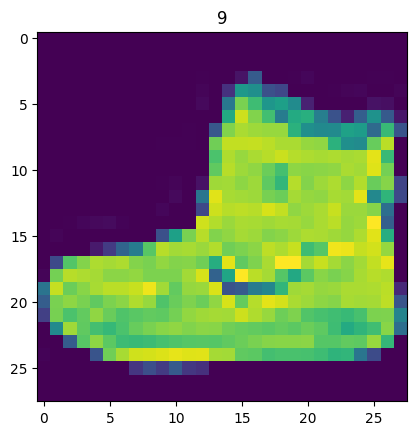

In [128]:
image, label = train_data[0]

print(f"Image shape: {image.shape}")

plt.imshow(image.squeeze())
plt.title(label)

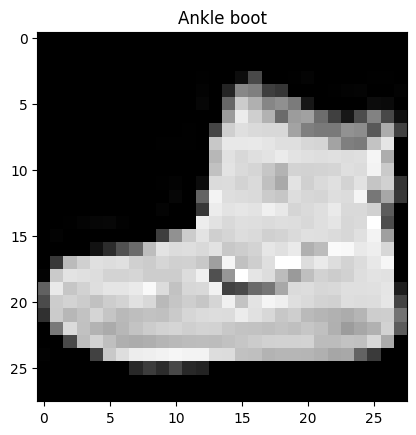

In [129]:
plt.imshow(image.squeeze(), cmap="gray");
plt.title(class_names[label]);

## 2. Prepare DataLoader

In [130]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [131]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

We want to turn our data into batches (or mini-batches)

In [132]:
BATCH_SIZE = 32

# Turn datasets into Python Iterable
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

In [133]:
print(type(train_dataloader))

<class 'torch.utils.data.dataloader.DataLoader'>


In [134]:
print(f"train_dataloader: {train_dataloader}")

train_dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7cd2a80830a0>


In [135]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
test_features_batch, test_labels_batch = next(iter(test_dataloader))

print(f"train_features_batch type: {type(train_features_batch)}")
print(f"train_features_batch shape: {train_features_batch.shape}")

print(f"train_labels_batch type: {type(train_labels_batch)}")
print(f"train_labels_batch shape: {train_labels_batch.shape}")

train_features_batch type: <class 'torch.Tensor'>
train_features_batch shape: torch.Size([32, 1, 28, 28])
train_labels_batch type: <class 'torch.Tensor'>
train_labels_batch shape: torch.Size([32])


len(train_features_batch): 32
random_idx: 6


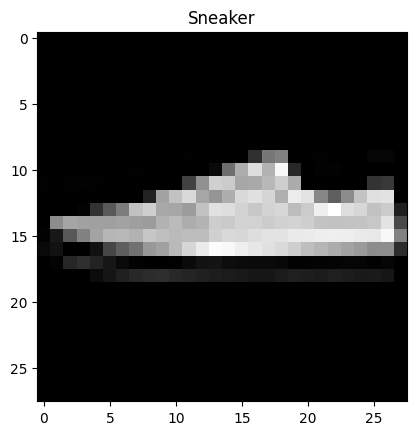

In [167]:
# Show a sample
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

print(f"len(train_features_batch): {len(train_features_batch)}")

random_idx = torch.randint(0, len(train_features_batch), (1,)).item()

print(f"random_idx: {random_idx}")

random_img, random_label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(random_img.squeeze(), cmap="gray");
plt.title(class_names[random_label]);

## 3. Model 0: Build a baseline model